In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#For Poisson Regression
from scipy.stats import poisson
import statsmodels.api as sm
import statsmodels.formula.api as smf

#For KMeans
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

# Poisson Regression

In [51]:
pdata = pd.read_csv('park-data.csv')
pdata = pdata.rename(columns = {'Number of Squirrels': 'num_squirrels',\
                                'Total Time (in minutes, if available)': 'time',\
                                'Number of Sighters': 'num_sighters', 
                                'Area ID': 'area_ID'})
pdata['area_ID'] = pd.Categorical(pdata['area_ID'])

In [57]:
ex = pdata["num_sighters"].values
#With number of sighters as just another variable
poi_fit_1 = smf.glm('num_squirrels ~ time + num_sighters + area_ID',\
                data = pdata, family = sm.families.Poisson()).fit()

#With number of sighters as exposure
poi_fit_2 = smf.glm('num_squirrels ~ time + area_ID',\
                data = pdata, family = sm.families.Poisson(),\
                exposure = ex).fit()
print(poi_fit_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_squirrels   No. Observations:                   25
Model:                            GLM   Df Residuals:                       19
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -170.60
Date:                Wed, 20 Dec 2023   Deviance:                       248.51
Time:                        20:23:17   Pearson chi2:                     222.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9966
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4951      0.193     18.085   

In [58]:
print(poi_fit_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_squirrels   No. Observations:                   25
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -195.25
Date:                Wed, 20 Dec 2023   Deviance:                       297.80
Time:                        20:23:20   Pearson chi2:                     291.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9969      0.164     18.245   

In [62]:
model_homo_predict = poi_fit_1.predict(pdata[['time', 'num_sighters', 'area_ID']]).values
model_hetero_pred = poi_fit_2.predict(pdata[['time', 'area_ID']]).values * pdata['num_sighters'].values
output = pd.DataFrame({'Number of Squirrels Observed': pdata['num_squirrels'].values,\
                       'Homogenous Predictions': model_homo_predict,\
                        'Heterogenous Model Predictions': model_hetero_pred})
output

,Number of Squirrels Observed,Homogenous Predictions,Heterogenous Model Predictions
0,12,18.958928,23.881575
1,24,22.706212,19.652856
2,16,15.553407,16.680574
3,15,25.960975,29.479284
4,28,25.960975,29.479284
5,34,19.859503,9.826428
6,11,16.502765,20.243743
7,16,47.983165,66.299697
8,25,19.347149,16.268560
9,51,29.650352,26.147935


# Clustering

## KMeans

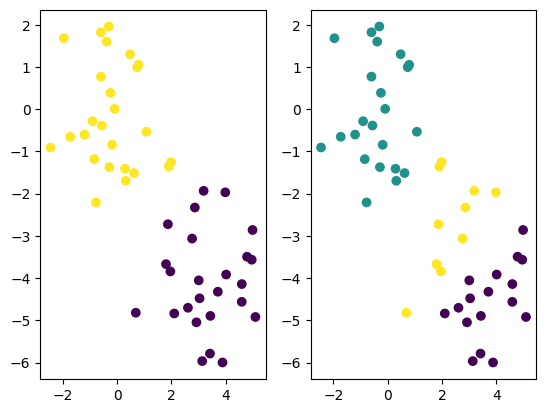

In [45]:
seed = 1
cdata = pd.read_csv("Cluster.csv")
kmeans2 = KMeans(n_clusters = 2, random_state = seed, n_init = 50).fit(cdata)
kmeans3 = KMeans(n_clusters = 3, random_state = seed, n_init = 50).fit(cdata)
fig, (ax_0, ax_1) = plt.subplots(nrows = 1, ncols = 2)
ax_0.scatter(cdata['V1'], cdata['V2'], c = kmeans2.labels_)
ax_1.scatter(cdata['V1'], cdata['V2'], c = kmeans3.labels_)
plt.show()

## Hierarchical Clustering

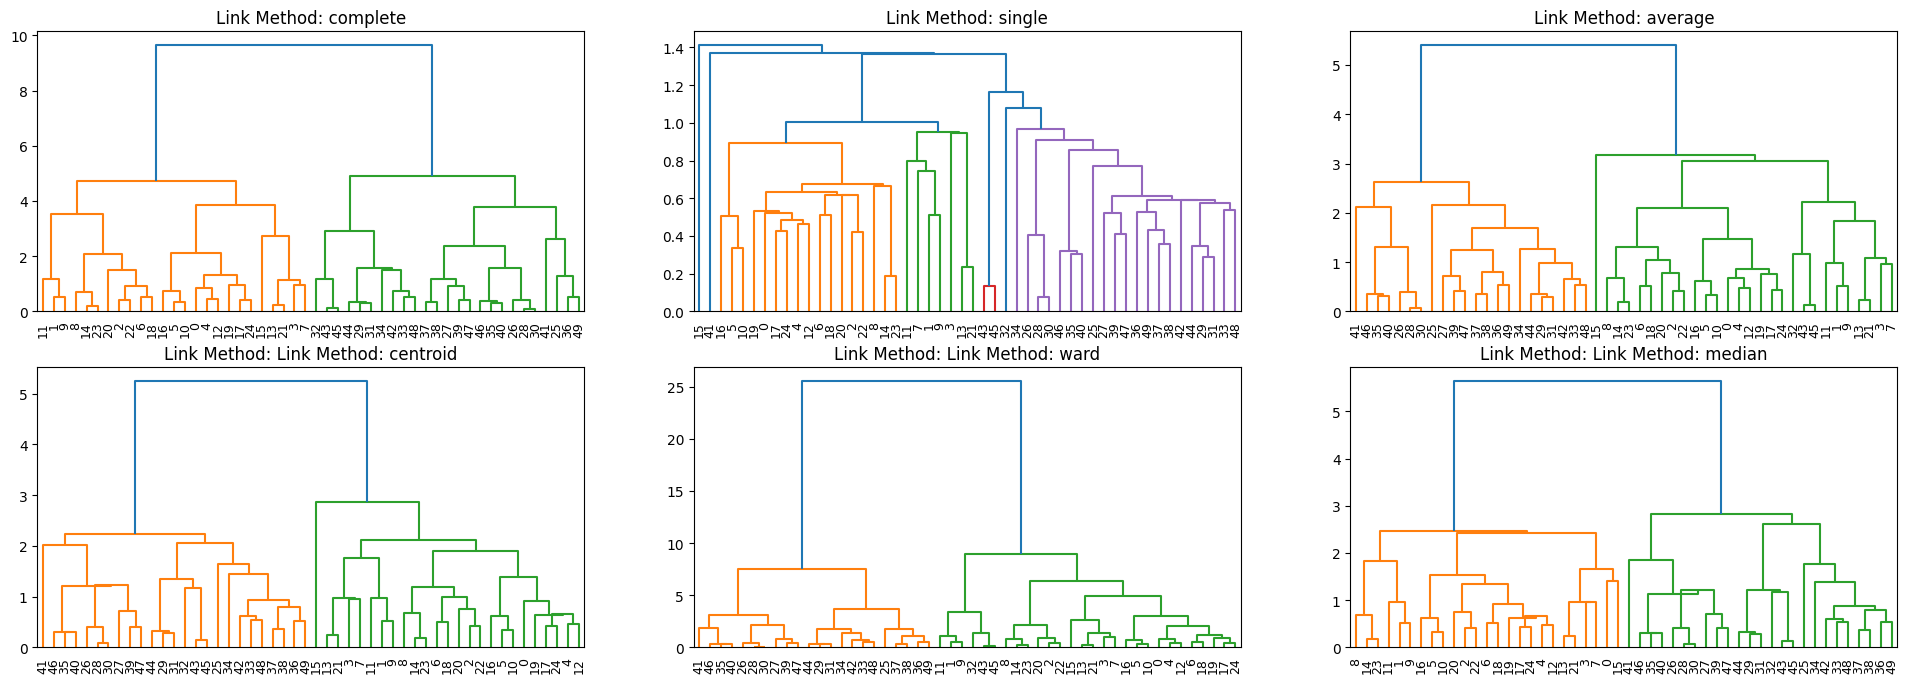

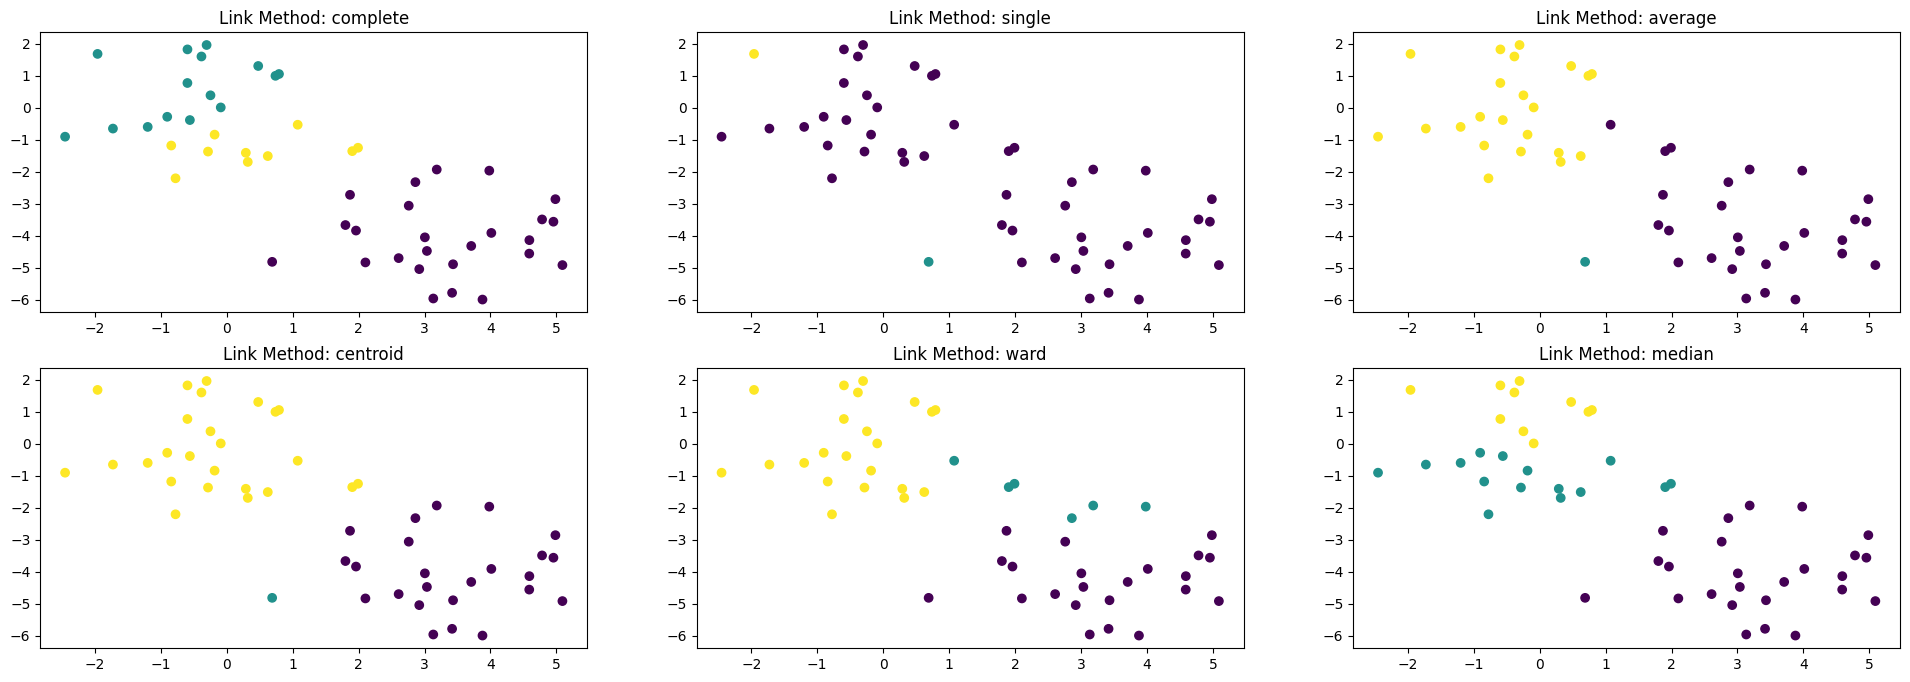

In [77]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (24,8))
fig2, ax2 = plt.subplots(nrows = 2, ncols = 3, figsize = (24,8))
link_method = ['complete', 'single', 'average', 'centroid', 'ward', 'median']
for i in range(len(link_method)):  
    hc = linkage(cdata, link_method[i])
    titLe = "Link Method: {}".format(link_method[i])
    if i < 3:
        dendrogram(hc, leaf_rotation = 90, leaf_font_size = 9, ax = ax[0,i])
        ax[0,i].set_title(titLe)
        ax2[0,i].scatter(cdata['V1'], cdata['V2'], c = cut_tree(hc, n_clusters = 3))
        ax2[0,i].set_title(titLe)
    elif i >= 3:
        dendrogram(hc, leaf_rotation = 90, leaf_font_size = 9, ax = ax[1,i - 3])
        ax[1,i - 3].set_title("Link Method: {}".format(titLe))
        ax2[1, i - 3].scatter(cdata['V1'], cdata['V2'], c = cut_tree(hc, n_clusters = 3))
        ax2[1,i - 3].set_title(titLe)